<a href="https://colab.research.google.com/github/Droslj/scATAC-seq-complete-/blob/Google-colab/scATAC_seq_(1)_complete.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

scATAC seq, partly based on scATAC seq processing Galaxy tutorials
(1) scATAC preprocessing
https://usegalaxy.eu/training-material/topics/single-cell/tutorials/scatac-preprocessing-tenx/tutorial.html#mapping-reads-to-a-reference-genome,

(2) Standard scATAC seq processing pipeline
https://usegalaxy.eu/training-material/topics/single-cell/tutorials/scatac-standard-processing-snapatac2/tutorial.html

AD Objects created in Galaxy using customized Galaxy WF with Snapatac2 and imported

Data taken from the following NCBI study:
Metabolic adaptation pilots the differentiation of human hematopoietic cells (https://www.ncbi.nlm.nih.gov/bioproject/PRJNA1015713)
Import Anndata objects for SRR26046013 (cells treated with AOA inhibitor)

Perform following steps:
Part I: Standard pipeline
(1) Import matrices
(2) Compute fragment size distribution
(3) Compute TSS enrichment
(4) Filter cell counts based on TSSe
(5) Create cell by bin matrix based on 500 bp wide bins accross the whole genome
(6) Perform feature selection
(7) Perform Doublet removal
(8) Perform Dim reduction (spectral)
(9) Perform Clustering (neighborhood, UMAP, leiden)
(10) Create a cell by gene matrix
(11) Impute with scanpy and magic
(12) Preprocess according to scanpy flow
Part II: Cell and cluster annotation
(1) Read reference file
(2) Read query file (CBB matrix)
(3) Data integration
(4) Perform label transfer/prediction
(5) Save predicted labels back to original matrix

In [ ]:
!pip install -q condacolab

In [ ]:
import condacolab

In [ ]:
condacolab.install()

In [ ]:
!conda --version

In [ ]:
!which conda

In [ ]:
!conda config --add channels conda-forge

In [ ]:
!conda config --add channels bioconda

In [1]:
!pip install snapatac2 -q

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 687.2/687.2 kB 10.7 MB/s eta 0:00:00
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 17.4/17.4 MB 4.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 129.0/129.0 kB 8.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.1/3.1 MB 87.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.2/12.2 MB 121.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 79.9/79.9 MB 26.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 144.3/144.3 kB 3.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.1/2.1 MB 76.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 50.4/50.4 kB 3.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 119.4/119.4 kB 9.1 MB/s eta 0:00:00
ERROR: pip's dependency resolver does not currently take into account all

In [2]:
!pip install snapatac2 -q

In [3]:
!pip show snapatac2

Name: snapatac2
Version: 2.8.0
Summary: SnapATAC2: Single-cell epigenomics analysis pipeline
Home-page: https://github.com/
Author: Kai Zhang <kai@kzhang.org>
Author-email: Kai Zhang <zhangkai33@westlake.edu.cn>
License: MIT
Location: /usr/local/lib/python3.11/dist-packages
Requires: anndata, igraph, kaleido, macs3, multiprocess, natsort, numpy, pandas, plotly, polars, pooch, pyarrow, pyfaidx, rustworkx, scikit-learn, scipy, tqdm, typeguard
Required-by: 


In [4]:
!pip install scvi-tools -q

  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 40.4/40.4 kB 2.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 459.3/459.3 kB 10.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 142.7/142.7 kB 10.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 815.2/815.2 kB 27.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 76.5/76.5 kB 5.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 41.0/41.0 kB 2.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 356.1/356.1 kB 23.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 756.0/756.0 kB 38.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 117.4/117.4 kB 9.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 927.3/927.3 kB 45.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 819.3/819.3 kB 43.8 MB/s eta 0:00:00
ERROR: pip's dependency resolver does not currently take into account all th

In [5]:
!pip install scvi-tools -q

In [6]:
import scvi

In [7]:
import snapatac2 as snap

In [8]:
!pip install umap-learn -q



   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 88.8/88.8 kB 3.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.9/56.9 kB 3.9 MB/s eta 0:00:00


In [9]:
import umap.umap_ as umap


In [10]:
from umap import UMAP

In [11]:
!pip install scanpy -q

  Preparing metadata (setup.py) ... done
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.1/2.1 MB 24.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 83.6/83.6 kB 6.6 MB/s eta 0:00:00


In [12]:
import scanpy as sc

In [13]:
pip show scanpy

Name: scanpy
Version: 1.10.4
Summary: Single-Cell Analysis in Python.
Home-page: https://scanpy.org
Author: Alex Wolf, Philipp Angerer, Fidel Ramirez, Isaac Virshup, Sergei Rybakov, Gokcen Eraslan, Tom White, Malte Luecken, Davide Cittaro, Tobias Callies, Marius Lange, Andrés R. Muñoz-Rojas
Author-email: 
License: 
Location: /usr/local/lib/python3.11/dist-packages
Requires: anndata, h5py, joblib, legacy-api-wrap, matplotlib, natsort, networkx, numba, numpy, packaging, pandas, patsy, pynndescent, scikit-learn, scipy, seaborn, session-info, statsmodels, tqdm, umap-learn
Required-by: 


In [14]:
!pip install magic-impute -q

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 45.4/45.4 kB 1.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 94.1/94.1 kB 3.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.2/12.2 MB 112.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.8/1.8 MB 62.1 MB/s eta 0:00:00
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
snapatac2 2.8.0 requires anndata<0.11.0,>=0.8.0, but you have anndata 0.11.3 which is incompatible.
google-colab 1.0.0 requires pandas==2.2.2, but you have pandas 2.0.3 which is incompatible.
xarray 2025.1.1 requires pandas>=2.1, but you have pandas 2.0.3 which is incompatible.
plotnine 0.14.5 requires pandas>=2.2.0, but you have pandas 2.0.3 which is incompatible.
mizani 0.13.1 requires pandas>=2.2.0, but you have pandas 2.0.3 which is incompatible.


In [15]:
!pip install magic-impute -q

In [16]:
!pip install leidenalg -q

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.0/2.0 MB 18.6 MB/s eta 0:00:00


In [17]:
import numpy as np

In [18]:
import anndata as ad

In [19]:
import matplotlib.pyplot as plt

In [20]:
import plotly.subplots as sp
import plotly.graph_objects as go

In [21]:
import pandas as pd

# Part I - Preprocess using standard pipeline

# Import fragment file from google drive (sinto fragments)

In [23]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
fragment_file = '/content/drive/MyDrive/Colab Notebooks/Sinto_fragments.bed'

In [ ]:
data = snap.pp.import_fragments(
    fragment_file,
    chrom_sizes=snap.genome.hg38,
    sorted_by_barcode=False,
)

In [ ]:
data

Compute fragment size distributions

In [ ]:
snap.metrics.frag_size_distr(data)

In [ ]:
snap.pl.frag_size_distr(data)

In [ ]:
data

# Compute and plot TSSe

In [ ]:
# Get genome annotation
gene_anno = snap.genome.hg38

In [ ]:
gene_anno

In [ ]:
# Compute TSSe metrics
snap.metrics.tsse(data, gene_anno)

In [ ]:
# Generate TSSE plots
snap.pl.tsse(data)

#Filter cell counts and TSSE values based on above plots

In [ ]:
snap.pp.filter_cells(data, min_counts=5000, min_tsse=10, max_counts=100000)

In [ ]:
data

# Create cell by bin matrix containing insertion counts across genome-wide 500-bp bins

In [ ]:
snap.pp.add_tile_matrix(data)

In [ ]:
data

# Perform feature selection

In [ ]:
snap.pp.select_features(data, n_features = 250000)

In [ ]:
data

# Doublet removal

In [ ]:
#Apply a scrublet algorithm to identify potential doublets
snap.pp.scrublet(data)

In [ ]:
data

In [ ]:
#Filter doublets
snap.pp.filter_doublets(data)

In [ ]:
data

# Dimension reduction

In [ ]:
snap.tl.spectral(data)

In [ ]:
data

In [ ]:
snap.tl.umap(data)

In [ ]:
data

# Clustering analysis


In [ ]:
# Calculate knn graph
snap.pp.knn(data)

In [ ]:
# Apply Leiden community detection
snap.tl.leiden(data)

In [ ]:
# Plot UMAP
snap.pl.umap(data, color = 'leiden', interactive = False, show = False)

In [ ]:
data

In [ ]:
data.write_h5ad('/content/drive/MyDrive/Colab Notebooks/CBB_matrix_processed.h5ad')

In [ ]:
import os

file_path = '/content/drive/MyDrive/Colab Notebooks/CBB_matrix_processed.h5ad'

if os.path.exists(file_path):
  print(f"The file '{file_path}' exists.")
else:
  print(f"The file '{file_path}' does not exist.")

# Create a cell-by-gene activity matrix

In [ ]:
gene_matrix = snap.pp.make_gene_matrix(data, snap.genome.hg38)

In [ ]:
gene_matrix

# Imputation with scanpy and MAGIC

In [ ]:
sc.pp.filter_genes(gene_matrix, min_cells= 5)

In [ ]:
sc.pp.normalize_total(gene_matrix)

In [ ]:
sc.pp.log1p(gene_matrix)

In [ ]:
sc.external.pp.magic(gene_matrix, solver="approximate")

In [ ]:
gene_matrix

# Copy back other annotations

In [ ]:
gene_matrix.obsm['X_umap'] = data.obsm['X_umap']

In [ ]:
gene_matrix.obsm['X_spectral'] = data.obsm['X_spectral']

In [ ]:
gene_matrix.obsm['fragment_paired'] = data.obsm['fragment_paired']

In [ ]:
gene_matrix.uns['refence_sequences'] = data.uns['reference_sequences']

In [ ]:
data

In [ ]:
gene_matrix

Save objects

In [ ]:
gene_matrix.write_h5ad('/content/drive/MyDrive/Colab Notebooks/CBG_matrix.h5ad')

In [ ]:
data.write_h5ad('/content/drive/MyDrive/Colab Notebooks/CBP_matrix.h5ad')

# Part II - Annotate using reference scRNA dataset

The process of setting up and training two models for label transfer using scvi-tools involves distinct steps for different purposes:

1.  SCVI Model:

Purpose: The SCVI model is trained to learn a latent representation of the data. This step helps in capturing the underlying structure and variability in the single-cell data.

Functionality: By training the SCVI model, you obtain a latent space that can be used for various downstream analyses, including clustering, visualization, and integration of datasets.

2. SCANVI Model:

Purpose: The SCANVI model extends the SCVI model by incorporating cell type labels. It is specifically designed for semi-supervised learning, where some cells have known labels (from the reference dataset) and others do not (from the query dataset).

Functionality: The SCANVI model uses the latent representation learned by the SCVI model and refines it by leveraging the cell type labels. This allows for accurate label transfer from the reference dataset to the query dataset.

In summary, the SCVI model is first trained to learn a robust latent representation of the data. The SCANVI model then builds on this representation to perform label transfer, effectively combining the strengths of unsupervised and semi-supervised learning

Reference:
https://discourse.scverse.org/t/label-transfer-discrepancy-in-scanvi-model-training/2011https://discourse.scverse.org/t/scanvi-inferred-cell-types-dont-make-sense/3300.


# Read reference file

In [ ]:
#reference = sc.read_h5ad('/content/drive/MyDrive/Colab Notebooks/PBMC_reference_atlas_final.h5ad')
reference = snap.read(snap.datasets.pbmc10k_multiome(), backed=None)

In [ ]:
reference

In [ ]:
reference.obs

# Read cell by gene matrix

In [ ]:
query = sc.read_h5ad('/content/drive/MyDrive/Colab Notebooks/CBG_matrix.h5ad')

In [ ]:
query

In [ ]:
query.obs['cell_type'] = pd.NA

In [ ]:
query

In [ ]:
data = ad.concat(
    [reference, query],
    join='inner',
    label='batch',
    keys=["reference", "query"],
    index_unique='_',
)
data

In [ ]:
data.obs

# Data integration
First we setup the scvi-tools to pretrain the model.

In [ ]:
# Train with scvi - part I
scvi.model.SCVI.setup_anndata(data, batch_key="batch")
vae = scvi.model.SCVI(
    data,
    n_layers=2,
    n_latent=30,
    gene_likelihood="nb",
    dispersion="gene-batch",
)

In [ ]:
vae.train(max_epochs=100, early_stopping=True)

In [ ]:
import matplotlib.pyplot as plt
import matplotlib

elbo_train = vae.history_['elbo_train']
elbo_validation = vae.history_['elbo_validation']

# Plot the training history
ax = elbo_train.plot()
elbo_validation.plot(ax=ax)

# Customize the plot
plt.xlabel("Epoch")
plt.ylabel("ELBO")
plt.title("Training and Validation ELBO")
plt.legend(["Training ELBO", "Validation ELBO"])

# Show the plot
plt.show()

In [ ]:
data

In [ ]:
data.obs["celltype_scanvi"] = 'Unknown'
ref_idx = data.obs['batch'] == "reference"
data.obs["celltype_scanvi"][ref_idx] = data.obs['cell_type'][ref_idx]

In [ ]:
data.obs

In [ ]:
# Train with scanvi - part II
lvae = scvi.model.SCANVI.from_scvi_model(
    vae,
    adata=data,
    labels_key="celltype_scanvi",
    unlabeled_category="Unknown",
)

In [ ]:
lvae.train(max_epochs=100, n_samples_per_label=100)

# Perform the label transfer/prediction
Obtain the joint embedding of reference and query data

In [ ]:
data.obs["C_scANVI"] = lvae.predict(data)
data.obsm["X_scANVI"] = lvae.get_latent_representation(data)
sc.pp.neighbors(data, use_rep="X_scANVI")
sc.tl.umap(data)
sc.pl.umap(data, color=['C_scANVI', "batch"], wspace=0.45)

In [ ]:
data

In [ ]:
data.obs['cell_type'] = data.obs['C_scANVI']

In [ ]:
data.obs

# Save predicted cell type labels back to the processed cell by bin matrix.
Required for Part III

In [ ]:
# Extract index of elements
idx = data.obs[data.obs['batch'] == 'query'].index

In [ ]:
filtered_data = data[idx, :]

In [ ]:
filtered_data.obs.index = filtered_data.obs.index.str.replace('_query', '')

In [ ]:
filtered_data

In [ ]:
filtered_data.obs

In [ ]:
data

In [ ]:
query = sc.read_h5ad('/content/drive/MyDrive/Colab Notebooks/CBB_matrix_processed.h5ad')

In [ ]:
query

In [ ]:
query.obs['cell_type'] = filtered_data.obs['cell_type']

In [ ]:
query.obs

In [ ]:
query.write_h5ad('/content/drive/MyDrive/Colab Notebooks/CBB_matrix_processed_annotated.h5ad')

# Part III - Identify differentially accessible regions

# Load annotated CBB matrix

In [24]:
data = sc.read_h5ad('/content/drive/MyDrive/Colab Notebooks/CBB_matrix_processed_annotated.h5ad')

In [25]:
data

AnnData object with n_obs × n_vars = 5806 × 6062095
    obs: 'n_fragment', 'frac_dup', 'frac_mito', 'tsse', 'doublet_probability', 'doublet_score', 'leiden', 'cell_type'
    var: 'count', 'selected'
    uns: 'TSS_profile', 'doublet_rate', 'frac_overlap_TSS', 'frag_size_distr', 'library_tsse', 'reference_sequences', 'scrublet_sim_doublet_score', 'spectral_eigenvalue'
    obsm: 'X_spectral', 'X_umap', 'fragment_paired'
    obsp: 'distances'

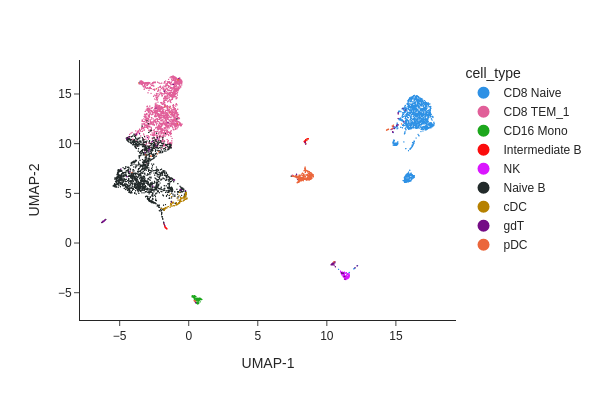

In [26]:
snap.pl.umap(data, color='cell_type', interactive=False)

# Identify peaks
Identify open chromatin regions in different cell populations

In [27]:
snap.tl.macs3(data, groupby='cell_type')

100%|██████████| 9/9 [07:12<00:00, 48.08s/it]


In [28]:
data

AnnData object with n_obs × n_vars = 5806 × 6062095
    obs: 'n_fragment', 'frac_dup', 'frac_mito', 'tsse', 'doublet_probability', 'doublet_score', 'leiden', 'cell_type'
    var: 'count', 'selected'
    uns: 'TSS_profile', 'doublet_rate', 'frac_overlap_TSS', 'frag_size_distr', 'library_tsse', 'reference_sequences', 'scrublet_sim_doublet_score', 'spectral_eigenvalue', 'macs3'
    obsm: 'X_spectral', 'X_umap', 'fragment_paired'
    obsp: 'distances'

# Call peaks

In [29]:
peaks = snap.tl.merge_peaks(data.uns['macs3'], snap.genome.hg38)

In [30]:
peaks

Peaks,CD8 TEM_1,Naive B,CD8 Naive,pDC,gdT,NK,CD16 Mono,cDC,Intermediate B
str,bool,bool,bool,bool,bool,bool,bool,bool,bool
"""chr1:15993-16494""",true,true,false,false,false,false,false,false,false
"""chr1:191586-192087""",true,true,true,false,true,false,false,false,false
"""chr1:267753-268254""",true,true,true,false,false,false,true,false,false
"""chr1:585950-586451""",false,true,true,false,false,false,false,false,false
"""chr1:605334-605835""",true,true,true,false,false,false,false,false,false
…,…,…,…,…,…,…,…,…,…
"""chrY:21706544-21707045""",true,false,false,false,false,false,false,false,false
"""chrY:21814448-21814949""",true,false,false,false,false,false,false,false,false
"""chrY:21831305-21831806""",true,true,false,false,false,false,false,false,false


# Create cell by peak matrix (CBP)

In [31]:
peak_mat = snap.pp.make_peak_matrix(data, use_rep=peaks['Peaks'])

In [32]:
peak_mat

AnnData object with n_obs × n_vars = 5806 × 239232
    obs: 'n_fragment', 'frac_dup', 'frac_mito', 'tsse', 'doublet_probability', 'doublet_score', 'leiden', 'cell_type'

# Find marker regions

In [33]:
marker_peaks = snap.tl.marker_regions(peak_mat, groupby='cell_type', pvalue=0.01)

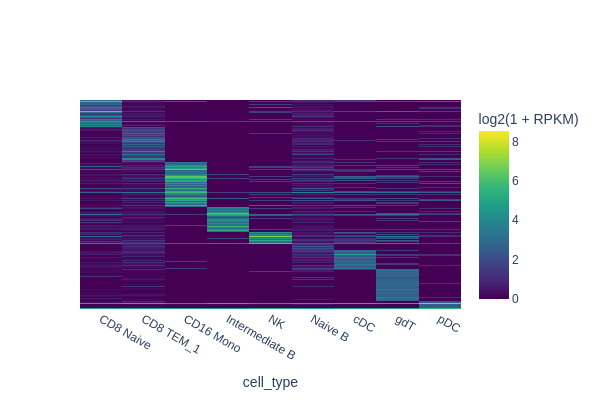

In [34]:
snap.pl.regions(peak_mat, groupby='cell_type', peaks=marker_peaks, interactive=False)

# Find motifs

In [35]:
motifs = snap.tl.motif_enrichment(
    motifs=snap.datasets.cis_bp(unique=True),
    regions=marker_peaks,
    genome_fasta=snap.genome.hg38,
)

100%|████████████████████████████████████████| 845M/845M [00:00<00:00, 543GB/s]
Decompressing '/root/.cache/snapatac2/gencode_v41_GRCh38.fa.gz' to '/root/.cache/snapatac2/gencode_v41_GRCh38.fa.gz.decomp' using method 'gzip'.
100%|██████████| 1165/1165 [08:37<00:00,  2.25it/s]


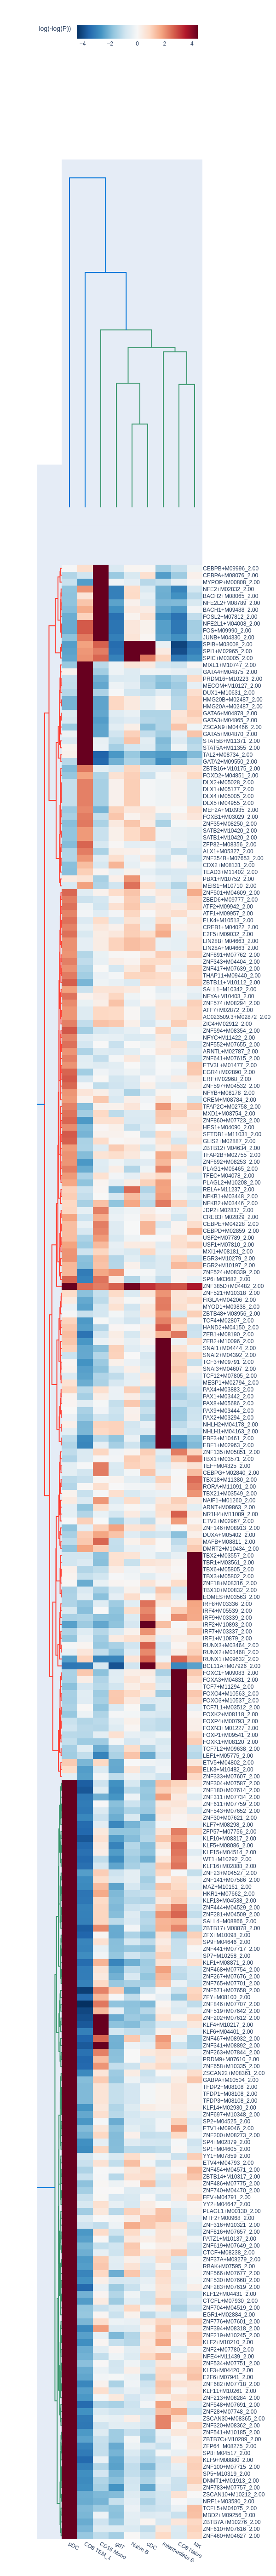

In [41]:
snap.pl.motif_enrichment(motifs, max_fdr=0.00001, height=5600, interactive=False)

# Regression based differential test
Perform differential testing between different groups of cells



In [42]:
# Select groups
group1 = "Naive B"
group2 = "gdT"

naive_B = data.obs['cell_type'] == group1
gdT = data.obs['cell_type'] == group2

# Select peaks that are present in either group
peaks_selected = np.logical_or(
    peaks[group1].to_numpy(),
    peaks[group2].to_numpy(),
)

In [ ]:
# Perform differential test
diff_peaks = snap.tl.diff_test(
    peak_mat,
    cell_group1=naive_B,
    cell_group2=gdT,
    features=peaks_selected,
)

  7%|▋         | 3210/48381 [00:48<12:23, 60.75it/s]

In [ ]:
# Filter the results based on adjusted p-value or FDR.

diff_peaks = diff_peaks.filter(pl.col('adjusted p-value') < 0.01)
diff_peaks.head()